In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [14]:
# Obtain the x and y coordinates for each of the three city types


urban = city_ride_data[city_ride_data["type"] == "Urban"]
suburban = city_ride_data[city_ride_data["type"] == "Suburban"]
rural = city_ride_data[city_ride_data["type"] == "Rural"]

In [15]:
# Create Urban city type

urbanrides = urban.groupby(["city"]).count()["ride_id"]
urbanfareavg = urban.groupby(["city"]).mean()["fare"]
urbandrivers = urban.groupby(["city"]).mean()["driver_count"]

In [16]:
# Create Suburban City Type
suburbanrides = suburban.groupby(["city"]).count()["ride_id"]
suburbanfareavg = suburban.groupby(["city"]).mean()["fare"]
suburbandrivers = suburban.groupby(["city"]).mean()["driver_count"]

In [17]:
# Create Rural City Type

ruralrides = rural.groupby(["city"]).count()["ride_id"]
ruralfareavg = rural.groupby(["city"]).mean()["fare"]
ruraldrivers = rural.groupby(["city"]).mean()["driver_count"]

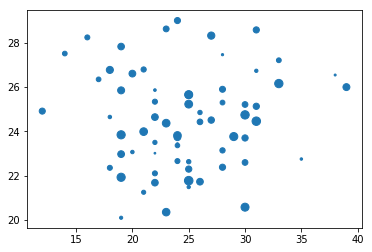

In [35]:
# Scatter Plot for Each City Type

# Urban Scatter
plt.scatter(urbanrides, urbanfareavg, urbandrivers)


# Save Plot to Output Folder

plt.savefig("Pyber_Plots/ScatterPlot.png")


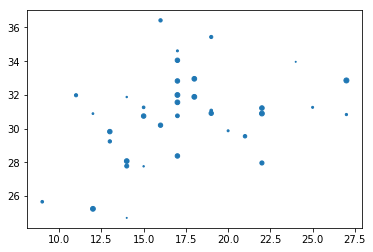

In [21]:
#Suburban Scatter Plot

plt.scatter(suburbanrides, suburbanfareavg, suburbandrivers)



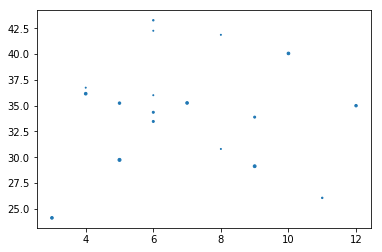

In [22]:
# Rural Scatter Plot

plt.scatter(ruralrides, ruralfareavg, ruraldrivers)

## Total Fares by City Type

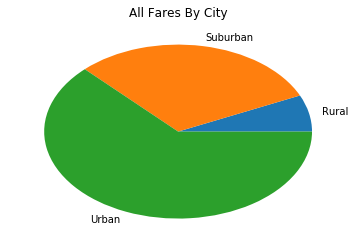

<Figure size 432x288 with 0 Axes>

In [36]:
# Calculate Type Percents

types = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])

plt.title("All Fares By City")

# Plot Chart

plt.show()

# Save Graph

plt.savefig("Pyber_Plots/PiebyCity.png")



## Total Rides by City Type

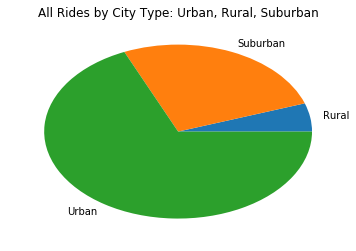

<Figure size 432x288 with 0 Axes>

In [37]:
# Calculate Ride Percents
riderspercentage = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart
plt.pie(riderspercentage, 
        labels=["Rural", "Suburban", "Urban"])

plt.title("All Rides by City Type: Urban, Rural, Suburban")

# Show Figure
plt.show()


# Save Plot

plt.savefig("Pyber_Plots/PieTotalRides.png")


## Total Drivers by City Type

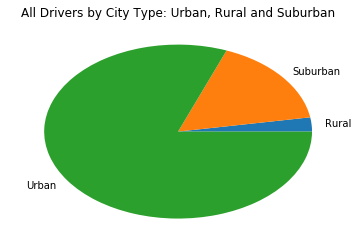

<Figure size 432x288 with 0 Axes>

In [38]:
# Create Driver Pertages


driverspercentage = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Create the Pie Chart

plt.pie(driverspercentage, 
        labels=["Rural", "Suburban", "Urban"])


plt.title("All Drivers by City Type: Urban, Rural and Suburban")

# Show Figure
plt.show()

# Save Plot

plt.savefig("Pyber_Plots/PiebyDrivers.png")